### Imports

In [1]:
import pandas as pd
import numpy as np

In [13]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, save
from bokeh.models import Label, Row, HoverTool, ColumnDataSource, Whisker, BoxZoomTool, ResetTool, PanTool, SaveTool
output_notebook()
import matplotlib.pyplot as plt

Loading BokehJS ...

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

### Load the summary data

In [3]:
path = '/Users/jmbrashe/VBBOrbital/WL_comparison/'
q_and_s_emu = pd.read_csv(f'{path}emusummary.csv', index_col=['data_challenge_lc_number'])
q_and_s_win = pd.read_csv(f'{path}winsummary.csv', index_col=['data_challenge_lc_number'])

In [28]:
path = '/Users/jmbrashe/VBBOrbital/all_bound_planet_parallax.csv'
plx_summary = pd.read_csv(path,index_col=['data_challenge_lc_number'])
sigs_piEN=(plx_summary['LO_piN']-plx_summary['LX_piN'])/plx_summary['LX_piN_error']
sigs_piEE=(plx_summary['LO_piE']-plx_summary['LX_piE'])/plx_summary['LX_piE_error']
np.where(sigs_piEN>=5)

(array([36]),)

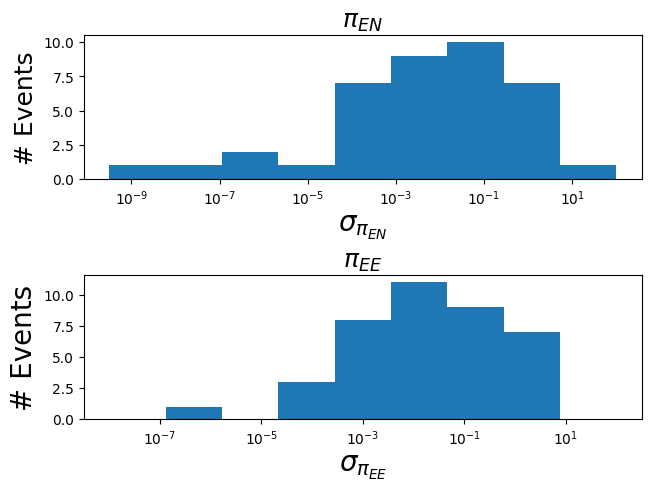

In [19]:
fig,axs = plt.subplots(2,1,dpi=100,layout='constrained')
ax =axs.flatten()
bins= np.logspace(-9.5,2,10)
ax[0].hist(sigs_piEN.abs(),bins=bins)
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$\sigma_{\pi_{EN}}$',size=20)
ax[0].set_ylabel('# Events',size=18)
ax[0].set_title(r'$\pi_{EN}$',size=18)
bins= np.logspace(-8,2,10)
ax[1].hist(sigs_piEE.abs(),bins=bins)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\sigma_{\pi_{EE}}$',size=20)
ax[1].set_ylabel('# Events',size=20)
ax[1].set_title(r'$\pi_{EE}$',size=18)
plt.savefig('/Users/jmbrashe/VBBOrbital/datachallengeplxsigma.png')

## Comparing Results between models

Text(0.5, 1.0, 'PLX vs No PLX')

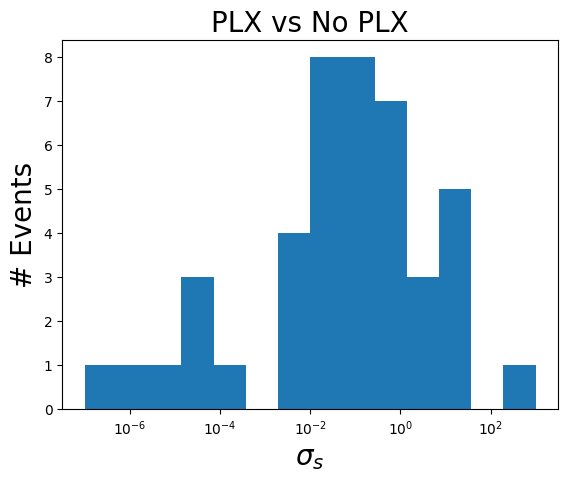

In [81]:
sigq_plx=(q_and_s_emu['LX_q']-q_and_s_emu['LS_q'])/q_and_s_emu['LX_q_err']
sigq_ob=(q_and_s_emu['LO_q']-q_and_s_emu['LX_q'])/q_and_s_emu['LX_q_err']

sigs_plx=(q_and_s_emu['LX_s']-q_and_s_emu['LS_s'])/q_and_s_emu['LX_s_err']
sigs_ob=(q_and_s_emu['LO_s']-q_and_s_emu['LX_s'])/q_and_s_emu['LX_s_err']

sigq_psbltrue=(q_and_s_emu['LS_q']-q_and_s_emu['true_q'])/q_and_s_emu['LS_q_err']
sigq_plxtrue=(q_and_s_emu['LX_q']-q_and_s_emu['true_q'])/q_and_s_emu['LX_q_err']
sigq_obtrue=(q_and_s_emu['LO_q']-q_and_s_emu['true_q'])/q_and_s_emu['LO_q_err']

sigs_psbltrue=(q_and_s_emu['LS_s']-q_and_s_emu['true_q'])/q_and_s_emu['LS_s_err']
sigs_plxtrue=(q_and_s_emu['LX_s']-q_and_s_emu['true_s'])/q_and_s_emu['LX_s_err']
sigs_obtrue=(q_and_s_emu['LO_s']-q_and_s_emu['true_s'])/q_and_s_emu['LO_s_err']


sigq_ob.abs()

bins= np.logspace(-7,3,15)
plt.hist(sigs_plx.abs(),bins=bins)
plt.xscale('log')
plt.xlabel(r'$\sigma_s$',size=20)
plt.ylabel('# Events',size=20)
plt.title('PLX vs No PLX',size=20)

In [ ]:
sigq_ob.abs()

bins= np.logspace(-7,3,15)
plt.hist(sigs_plx.abs(),bins=bins)
plt.xscale('log')
plt.xlabel(r'$\sigma_s$',size=20)
plt.ylabel('# Events',size=20)
plt.title('PLX vs No PLX',size=20)

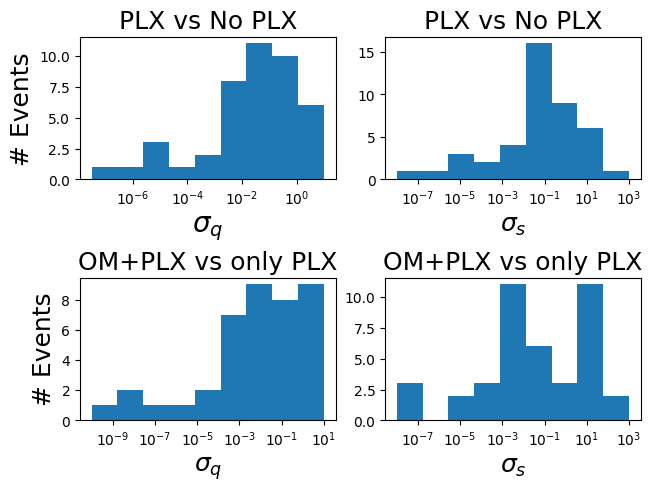

In [86]:
fig, axs = plt.subplots(2,2,dpi=100,layout='constrained')

ax =axs.flatten()
bins= np.logspace(-7.5,1,10)
ax[0].hist(sigq_plx.abs(),bins=bins)
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$\sigma_q$',size=20)
ax[0].set_ylabel('# Events',size=18)
ax[0].set_title('PLX vs No PLX',size=18)

bins= np.logspace(-8,3,10)
ax[1].hist(sigs_plx.abs(),bins=bins)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\sigma_s$',size=18)
#ax[1].set_ylabel('# Events',size=20)
ax[1].set_title('PLX vs No PLX',size=18)


bins= np.logspace(-10,1,10)
ax[2].hist(sigq_ob.abs(),bins=bins)
ax[2].set_xscale('log')
ax[2].set_xlabel(r'$\sigma_q$',size=18)
ax[2].set_ylabel('# Events',size=18)
ax[2].set_title('OM+PLX vs only PLX',size=18)

bins= np.logspace(-8,3,10)
ax[3].hist(sigs_ob.abs(),bins=bins)
ax[3].set_xscale('log')
ax[3].set_xlabel(r'$\sigma_s$',size=18)
#ax[3].set_ylabel('# Events',size=20)
ax[3].set_title('OM+PLX vs only PLX',size=18)
plt.savefig('/Users/jmbrashe/VBBOrbital/datachallengesigma.png')

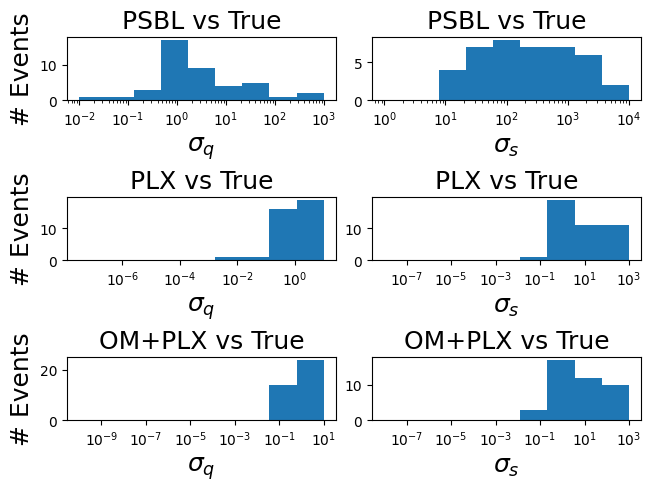

In [94]:
ig, axs = plt.subplots(3,2,dpi=100,layout='constrained')

ax =axs.flatten()

bins= np.logspace(-2,3,10)
ax[0].hist(sigq_psbltrue.abs(),bins=bins)
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$\sigma_q$',size=18)
ax[0].set_ylabel('# Events',size=18)
ax[0].set_title('PSBL vs True',size=18)

bins= np.logspace(-0,4,10)
ax[1].hist(sigs_psbltrue.abs(),bins=bins)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\sigma_s$',size=18)
#ax[1].set_ylabel('# Events',size=20)
ax[1].set_title('PSBL vs True',size=18)



bins= np.logspace(-7.5,1,10)
ax[2].hist(sigq_plxtrue.abs(),bins=bins)
ax[2].set_xscale('log')
ax[2].set_xlabel(r'$\sigma_q$',size=18)
ax[2].set_ylabel('# Events',size=18)
ax[2].set_title('PLX vs True',size=18)

bins= np.logspace(-8,3,10)
ax[3].hist(sigs_plxtrue.abs(),bins=bins)
ax[3].set_xscale('log')
ax[3].set_xlabel(r'$\sigma_s$',size=18)
#ax[1].set_ylabel('# Events',size=20)
ax[3].set_title('PLX vs True',size=18)


bins= np.logspace(-10,1,10)
ax[4].hist(sigq_obtrue.abs(),bins=bins)
ax[4].set_xscale('log')
ax[4].set_xlabel(r'$\sigma_q$',size=18)
ax[4].set_ylabel('# Events',size=18)
ax[4].set_title('OM+PLX vs True',size=18)

bins= np.logspace(-8,3,10)
ax[5].hist(sigs_obtrue.abs(),bins=bins)
ax[5].set_xscale('log')
ax[5].set_xlabel(r'$\sigma_s$',size=18)
#ax[3].set_ylabel('# Events',size=20)
ax[5].set_title('OM+PLX vs True',size=18)
plt.savefig('/Users/jmbrashe/VBBOrbital/truesigma.png')

### Defining plotting functions

In [10]:
def plotting_mass_ratio(q_and_s_summary_df,model_type, x_range=None, y_range=None):
    if model_type =='LS':
        title = f'Mass-ratio - 2L1S ({model_type})'
    elif model_type == 'LX':
        title = f'Mass-ratio - 2L1S+parallax ({model_type})'
    elif model_type == 'LO':
        title = f'Mass-ratio - 2L1S+parallax+OM ({model_type})'    
    else:
        raise ValueError(f'model_type {model_type} should be LS, LX or LO')
    source = ColumnDataSource(data=dict(
    x=q_and_s_summary_df['true_q'],
    y=q_and_s_summary_df[f'{model_type}_q'],
    upper=q_and_s_summary_df[f'{model_type}_q']+q_and_s_summary_df[f'{model_type}_q_err'],   
    lower=q_and_s_summary_df[f'{model_type}_q']-q_and_s_summary_df[f'{model_type}_q_err'],
    desc=q_and_s_summary_df.index,
    ))
    hover = HoverTool(tooltips=[
        ("(true,model)", "($x, $y)"),
        ("LC#", "@desc")
    ])
    if x_range is None:
        p = figure(width=350, height=350, title=title, x_axis_label='true q', y_axis_label=f'{model_type} q', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    else:
        p = figure(width=350, height=350, title=title, x_axis_label='true q', y_axis_label=f'{model_type} q', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()], x_range=x_range, y_range=y_range)
    p = figure(width=350, height=350, title=title, x_axis_label='true q', y_axis_label=f'{model_type} q', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    p.line([0, 0.025], [0, 0.025], line_width=1, line_color='red')
    p.scatter('x', 'y', size=5, fill_alpha=0.6, source=source)
    whisker_errorbar = Whisker(source=source, base="x", upper="upper", lower="lower",
                               line_width=1.0, line_alpha=1.0)  # level="overlay",
    p.add_layout(whisker_errorbar)
    # p.scatter(q_and_s_summary_df['true_q'][107], q_and_s_summary_df[f'{model_type}_q'][107], size=5, fill_alpha=0.6, fill_color='red')
    # p.scatter(q_and_s_summary_df['true_q'][226], q_and_s_summary_df[f'{model_type}_q'][226], size=5, fill_alpha=0.6, fill_color='red')
    discrepancy = [107, 226]
    for event in discrepancy:
        citation = Label(x=q_and_s_summary_df['true_q'][event] + 0.001, y=q_and_s_summary_df[f'{model_type}_q'][event] - 0.025, text=f'LC# {event}', text_font_size='12px')
        p.add_layout(citation)
    if model_type == 'LO':
        citation_3 = Label(x=q_and_s_summary_df['true_q'][214] + 0.001, y=q_and_s_summary_df[f'{model_type}_q'][214] - 0.025, text=f'LC# {214}', text_font_size='12px')
        p.add_layout(citation_3)
    return p

In [14]:
def plotting_separation(q_and_s_summary_df,model_type, x_range=None, y_range=None):
    if model_type =='LS':
        title = f'Separation - 2L1S ({model_type})'
    elif model_type == 'LX':
        title = f'Separation - 2L1S+parallax ({model_type})'
    elif model_type == 'LO':
        title = f'Separation - 2L1S+parallax+OM ({model_type})'    
    else:
        raise ValueError(f'model_type {model_type} should be LS, LX or LO')
    source = ColumnDataSource(data=dict(
    x=q_and_s_summary_df['true_s'],
    y=q_and_s_summary_df[f'{model_type}_s'],
    upper=q_and_s_summary_df[f'{model_type}_s']+q_and_s_summary_df[f'{model_type}_s_err'],   
    lower=q_and_s_summary_df[f'{model_type}_s']-q_and_s_summary_df[f'{model_type}_s_err'],
    desc=q_and_s_summary_df.index,
    ))
    hover = HoverTool(tooltips=[
        ("(true,model)", "($x, $y)"),
        ("LC#", "@desc")
    ])
    if x_range is None:
        p = figure(width=350, height=350, title=title, x_axis_label='true s', y_axis_label=f'{model_type} s', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    else:
       p = figure(width=350, height=350, title=title, x_axis_label='true s', y_axis_label=f'{model_type} s', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()], x_range=x_range, y_range=y_range) 
    # add a circle renderer with vectorized colors and sizes
    p.line([0, 5.5], [0, 5.5], line_width=1, line_color='red')
    p.scatter('x', 'y', size=5, fill_alpha=0.6, source=source)
    whisker_errorbar = Whisker(source=source, base="x", upper="upper", lower="lower",
                               line_width=1.0, line_alpha=1.0)  # level="overlay",
    p.add_layout(whisker_errorbar)
    return p

In [55]:
def plotting_mass_ratio_winvslinux(q_and_s_summary_df_win,q_and_s_summary_df_linux,model_type, x_range=None, y_range=None):
    if model_type =='LS':
        title = f'Mass-ratio - 2L1S ({model_type})'
    elif model_type == 'LX':
        title = f'Mass-ratio - 2L1S+parallax ({model_type})'
    elif model_type == 'LO':
        title = f'Mass-ratio - 2L1S+parallax+OM ({model_type})'    
    else:
        raise ValueError(f'model_type {model_type} should be LS, LX or LO')
    source = ColumnDataSource(data=dict(
    x=q_and_s_summary_df_linux['true_q'],
    y=q_and_s_summary_df_linux[f'{model_type}_q'],
    z=q_and_s_summary_df_win[f'{model_type}_q'],
    upper=q_and_s_summary_df_linux[f'{model_type}_q']+q_and_s_summary_df_linux[f'{model_type}_q_err'],   
    lower=q_and_s_summary_df_linux[f'{model_type}_q']-q_and_s_summary_df_linux[f'{model_type}_q_err'],
    upper2=q_and_s_summary_df_win[f'{model_type}_q']+q_and_s_summary_df_win[f'{model_type}_q_err'],   
    lower2=q_and_s_summary_df_win[f'{model_type}_q']-q_and_s_summary_df_win[f'{model_type}_q_err'],
    desc=q_and_s_summary_df_linux.index,
    ))
    hover = HoverTool(tooltips=[
        ("(true,linux model, windows model)", "($x, $y, @z)"),
        ("LC#", "@desc")
    ])
    if x_range is None:
        p = figure(width=350, height=350, title=title, x_axis_label=f'Windows {model_type} q', y_axis_label=f'Linux {model_type} q', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    else:
        p = figure(width=350, height=350, title=title, x_axis_label=f'Windows {model_type} q', y_axis_label=f'Linux {model_type} q', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()], x_range=x_range, y_range=y_range)
    p = figure(width=350, height=350, title=title, x_axis_label=f'Windows {model_type} q', y_axis_label=f'Linux {model_type} q', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    p.line([0, 1], [0, 1], line_width=1, line_color='red')
    p.scatter('z', 'y', size=5, fill_alpha=0.6, source=source)
    whisker_errorbar = Whisker(source=source, base="z", upper="upper", lower="lower",
                               line_width=1.0, line_alpha=1.0)  # level="overlay",
    p.add_layout(whisker_errorbar)
    whisker_errorbar2 = Whisker(source=source, base="y",dimension="width", upper="upper2", lower="lower2",
                               line_width=1.0, line_alpha=1.0)
    p.add_layout(whisker_errorbar2)
    # p.scatter(q_and_s_summary_df['true_q'][107], q_and_s_summary_df[f'{model_type}_q'][107], size=5, fill_alpha=0.6, fill_color='red')
    # p.scatter(q_and_s_summary_df['true_q'][226], q_and_s_summary_df[f'{model_type}_q'][226], size=5, fill_alpha=0.6, fill_color='red')
    discrepancy = [107, 226]
    #for event in discrepancy:
    #    citation = Label(x=q_and_s_summary_df_linux['true_q'][event] + 0.001, y=q_and_s_summary_df_linux[f'{model_type}_q'][event] - 0.025, text=f'LC# {event}', text_font_size='12px')
    #    p.add_layout(citation)
    #if model_type == 'LO':
    #    citation_3 = Label(x=q_and_s_summary_df_linux['true_q'][214] + 0.001, y=q_and_s_summary_df_linux[f'{model_type}_q'][214] - 0.025, text=f'LC# {214}', text_font_size='12px')
    #    p.add_layout(citation_3)
    return p

In [60]:
def plotting_separation_winvslinux(q_and_s_summary_df_win,q_and_s_summary_df_linux,model_type, x_range=None, y_range=None):
    if model_type =='LS':
        title = f'Mass-ratio - 2L1S ({model_type})'
    elif model_type == 'LX':
        title = f'Mass-ratio - 2L1S+parallax ({model_type})'
    elif model_type == 'LO':
        title = f'Mass-ratio - 2L1S+parallax+OM ({model_type})'    
    else:
        raise ValueError(f'model_type {model_type} should be LS, LX or LO')
    source = ColumnDataSource(data=dict(
    x=q_and_s_summary_df_linux['true_s'],
    y=q_and_s_summary_df_linux[f'{model_type}_s'],
    z=q_and_s_summary_df_win[f'{model_type}_s'],
    upper=q_and_s_summary_df_linux[f'{model_type}_s']+q_and_s_summary_df_linux[f'{model_type}_s_err'],   
    lower=q_and_s_summary_df_linux[f'{model_type}_s']-q_and_s_summary_df_linux[f'{model_type}_s_err'],
    upper2=q_and_s_summary_df_win[f'{model_type}_s']+q_and_s_summary_df_win[f'{model_type}_s_err'],   
    lower2=q_and_s_summary_df_win[f'{model_type}_s']-q_and_s_summary_df_win[f'{model_type}_s_err'],
    desc=q_and_s_summary_df_linux.index,
    ))
    hover = HoverTool(tooltips=[
        ("(true,linux model, windows model)", "($x, $y, @z)"),
        ("LC#", "@desc")
    ])
    if x_range is None:
        p = figure(width=350, height=350, title=title, x_axis_label=f'Windows {model_type} s', y_axis_label=f'Linux {model_type} s', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    else:
        p = figure(width=350, height=350, title=title, x_axis_label=f'Windows {model_type} s', y_axis_label=f'Linux {model_type} s', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()], x_range=x_range, y_range=y_range)
    p = figure(width=350, height=350, title=title, x_axis_label=f'Windows {model_type} s', y_axis_label=f'Linux {model_type} s', tools=[hover, BoxZoomTool(), ResetTool(), PanTool(), SaveTool()])
    p.line([0, 4], [0, 4], line_width=1, line_color='red')
    p.scatter('z', 'y', size=5, fill_alpha=0.6, source=source)
    whisker_errorbar = Whisker(source=source, base="z", upper="upper", lower="lower",
                               line_width=1.0, line_alpha=1.0)  # level="overlay",
    p.add_layout(whisker_errorbar)
    whisker_errorbar2 = Whisker(source=source, base="y",dimension="width", upper="upper2", lower="lower2",
                               line_width=1.0, line_alpha=1.0)
    p.add_layout(whisker_errorbar2)
    # p.scatter(q_and_s_summary_df['true_q'][107], q_and_s_summary_df[f'{model_type}_q'][107], size=5, fill_alpha=0.6, fill_color='red')
    # p.scatter(q_and_s_summary_df['true_q'][226], q_and_s_summary_df[f'{model_type}_q'][226], size=5, fill_alpha=0.6, fill_color='red')
    discrepancy = [107, 226]
    #for event in discrepancy:
    #    citation = Label(x=q_and_s_summary_df_linux['true_q'][event] + 0.001, y=q_and_s_summary_df_linux[f'{model_type}_q'][event] - 0.025, text=f'LC# {event}', text_font_size='12px')
    #    p.add_layout(citation)
    #if model_type == 'LO':
    #    citation_3 = Label(x=q_and_s_summary_df_linux['true_q'][214] + 0.001, y=q_and_s_summary_df_linux[f'{model_type}_q'][214] - 0.025, text=f'LC# {214}', text_font_size='12px')
    #    p.add_layout(citation_3)
    return p

## Mass ratio: Linux

In [12]:
p1 = plotting_mass_ratio(q_and_s_emu,model_type = 'LS')
p2 = plotting_mass_ratio(q_and_s_emu,model_type = 'LX', x_range=p1.x_range, y_range=p1.y_range)
p3 = plotting_mass_ratio(q_and_s_emu,model_type = 'LO', x_range=p1.x_range, y_range=p1.y_range)
show(Row(p1, p2, p3))

## Separation: Linux

In [15]:
p1 = plotting_separation(q_and_s_emu,model_type = 'LS')
p2 = plotting_separation(q_and_s_emu,model_type = 'LX', x_range=p1.x_range, y_range=p1.y_range)
p3 = plotting_separation(q_and_s_emu,model_type = 'LO', x_range=p1.x_range, y_range=p1.y_range)
show(Row(p1, p2, p3))

## Mass ratio: Windows

In [16]:
p1 = plotting_mass_ratio(q_and_s_win,model_type = 'LS')
p2 = plotting_mass_ratio(q_and_s_win,model_type = 'LX', x_range=p1.x_range, y_range=p1.y_range)
p3 = plotting_mass_ratio(q_and_s_win,model_type = 'LO', x_range=p1.x_range, y_range=p1.y_range)
show(Row(p1, p2, p3))

## Separation: Windows

In [17]:
p1 = plotting_separation(q_and_s_win,model_type = 'LS')
p2 = plotting_separation(q_and_s_win,model_type = 'LX', x_range=p1.x_range, y_range=p1.y_range)
p3 = plotting_separation(q_and_s_win,model_type = 'LO', x_range=p1.x_range, y_range=p1.y_range)
show(Row(p1, p2, p3))

In [56]:
p1 = plotting_mass_ratio_winvslinux(q_and_s_win,q_and_s_emu,model_type = 'LS')
p2 = plotting_mass_ratio_winvslinux(q_and_s_win,q_and_s_emu,model_type = 'LX', x_range=p1.x_range, y_range=p1.y_range)
p3 = plotting_mass_ratio_winvslinux(q_and_s_win,q_and_s_emu,model_type = 'LO', x_range=p1.x_range, y_range=p1.y_range)
show(Row(p1, p2, p3))

In [61]:
p1 = plotting_separation_winvslinux(q_and_s_win,q_and_s_emu,model_type = 'LS')
p2 = plotting_separation_winvslinux(q_and_s_win,q_and_s_emu,model_type = 'LX', x_range=p1.x_range, y_range=p1.y_range)
p3 = plotting_separation_winvslinux(q_and_s_win,q_and_s_emu,model_type = 'LO', x_range=p1.x_range, y_range=p1.y_range)
show(Row(p1, p2, p3))